## Problem-1

## Python Libraries

In [1]:
import pandas as pd
import numpy as np

#Date Importing
from datetime import datetime
from datetime import timedelta

#Library for Graphical Representation
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn

#Library for Statistical Analysis
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Libraries
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
credit_data=pd.read_csv('~/Downloads/Data_problem  1.csv')
credit_data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
credit_data.shape

(8950, 18)

In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit_data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## Handling Missing Values 

In [6]:
credit_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Checking the Duplicate Values and Removing of Duplicate Values

In [7]:
credit_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

In [8]:
credit_data.columns=credit_data.columns.str.lower()
credit_data

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      installments_purchases  cash_advance  purchases_frequency  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         payments  minimum_payments  prc_full_payment  tenure  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [9]:
credit_data.isna().any()

cust_id                             False
balance                             False
balance_frequency                   False
purchases                           False
oneoff_purchases                    False
installments_purchases              False
cash_advance                        False
purchases_frequency                 False
oneoff_purchases_frequency          False
purchases_installments_frequency    False
cash_advance_frequency              False
cash_advance_trx                    False
purchases_trx                       False
credit_limit                         True
payments                            False
minimum_payments                     True
prc_full_payment                    False
tenure                              False
dtype: bool

In [10]:
credit_data['credit_limit'].fillna(credit_data['credit_limit'].median(),inplace=True)
credit_data['minimum_payments'].fillna(credit_data['minimum_payments'].median(),inplace=True)

In [11]:
credit_data.isna().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

## 1. Monthly average purchase and cash advance amount

In [12]:
# Monthly Average Purchase = purchases/tenure
credit_data['monthly_avg_purchase']=credit_data['purchases']/credit_data['tenure']
print(credit_data['monthly_avg_purchase'].head(),'\n',credit_data['tenure'].head(),'\n', 
      credit_data['purchases'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: monthly_avg_purchase, dtype: float64 
 0    12
1    12
2    12
3    12
4    12
Name: tenure, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: purchases, dtype: float64


In [13]:
# Monthly Cash Advance Amount = cash_advance / tenure
credit_data['monthly_cash_advance']=credit_data['cash_advance']/credit_data['tenure']
print(credit_data['monthly_cash_advance'].head(),'\n',credit_data['tenure'].head(),'\n', 
      credit_data['cash_advance'].head())

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: monthly_cash_advance, dtype: float64 
 0    12
1    12
2    12
3    12
4    12
Name: tenure, dtype: int64 
 0       0.000000
1    6442.945483
2       0.000000
3     205.788017
4       0.000000
Name: cash_advance, dtype: float64


## 2. Purchases by type (one-off, installments)

In [14]:
credit_data.loc[:,['oneoff_purchases','installments_purchases']]

oneoff_purchases  installments_purchases
0                 0.00                   95.40
1                 0.00                    0.00
2               773.17                    0.00
3              1499.00                    0.00
4                16.00                    0.00
...                ...                     ...
8945              0.00                  291.12
8946              0.00                  300.00
8947              0.00                  144.40
8948              0.00                    0.00
8949           1093.25                    0.00

[8950 rows x 2 columns]

In [15]:
credit_data[(credit_data['oneoff_purchases']==0) & (credit_data['installments_purchases']==0)].shape

(2042, 20)

In [16]:
credit_data[(credit_data['oneoff_purchases']>0) & (credit_data['installments_purchases']>0)].shape

(2774, 20)

In [17]:
credit_data[(credit_data['oneoff_purchases']==0) & (credit_data['installments_purchases']>0)].shape

(2260, 20)

In [18]:
credit_data[(credit_data['oneoff_purchases']>0) & (credit_data['installments_purchases']==0)].shape

(1874, 20)

## 3. Average amount per purchase and cash advance transaction

In [19]:
def credit_purchase(credit):
    if (credit['oneoff_purchases']==0) & (credit['installments_purchases']==0):
        return 'None'
    if (credit['oneoff_purchases']>0) & (credit['installments_purchases']>0):
         return 'Oneoff and Installment'
    if (credit['oneoff_purchases']>0) & (credit['installments_purchases']==0):
        return 'Oneoff'
    if (credit['oneoff_purchases']==0) & (credit['installments_purchases']>0):
        return 'Installment'

In [20]:
credit_data['purchase_type']=credit_data.apply(credit_purchase,axis=1)

In [21]:
credit_data['purchase_type'].value_counts()

Oneoff and Installment    2774
Installment               2260
None                      2042
Oneoff                    1874
Name: purchase_type, dtype: int64

## 4. Limit usage (balance to credit limit ratio)

In [22]:
credit_data['limit_usage']=credit_data.apply(lambda x: x['balance']/x['credit_limit'], axis=1)
credit_data['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [23]:
#5. Payments to minimum payments ratio etc (think of more types of similar analysis)
credit_data['payments'].isnull().any()

False

In [24]:
credit_data['minimum_payments'].isnull().value_counts()

False    8950
Name: minimum_payments, dtype: int64

In [25]:
credit_data['payments'].describe()

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
25%        383.276166
50%        856.901546
75%       1901.134317
max      50721.483360
Name: payments, dtype: float64

In [26]:
credit_data['payment_to_minpayments']=credit_data.apply(lambda x:x['payments']/x['minimum_payments'],axis=1)

In [27]:
credit_data['payment_to_minpayments']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_to_minpayments, Length: 8950, dtype: float64

### Treatment of Extreme Values
###  Since there are variables having extreme values so 
### I am doing log-transformation on the dataset to remove outlier effect
### log tranformation

In [28]:
credit_log=credit_data.drop(['cust_id','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [29]:
credit_log.describe()

balance  balance_frequency    purchases  oneoff_purchases  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      6.161637           0.619940     4.899647          3.204274   
std       2.013303           0.148590     2.916872          3.246365   
min       0.000000           0.000000     0.000000          0.000000   
25%       4.861995           0.635989     3.704627          0.000000   
50%       6.773521           0.693147     5.892417          3.663562   
75%       7.628099           0.693147     7.013133          6.360274   
max       9.854515           0.693147    10.800403         10.615512   

       installments_purchases  cash_advance  purchases_frequency  \
count             8950.000000   8950.000000          8950.000000   
mean                 3.352403      3.319086             0.361268   
std                  3.082973      3.566298             0.277317   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.080042   
50%                  4.499810      0.000000             0.405465   
75%                  6.151961      7.016449             0.650588   
max                 10.021315     10.760839             0.693147   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8950.000000                       8950.000000   
mean                     0.158699                          0.270072   
std                      0.216672                          0.281852   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.080042                          0.154151   
75%                      0.262364                          0.559616   
max                      0.693147                          0.693147   

       cash_advance_frequency  ...  purchases_trx  credit_limit     payments  \
count             8950.000000  ...    8950.000000   8950.000000  8950.000000   
mean                 0.113512  ...       1.894731      8.094825     6.624540   
std                  0.156716  ...       1.373856      0.819629     1.591763   
min                  0.000000  ...       0.000000      3.931826     0.000000   
25%                  0.000000  ...       0.693147      7.378384     5.951361   
50%                  0.000000  ...       2.079442      8.006701     6.754489   
75%                  0.200671  ...       2.890372      8.779711     7.550732   
max                  0.916291  ...       5.883322     10.308986    10.834125   

       minimum_payments  prc_full_payment       tenure  monthly_avg_purchase  \
count       8950.000000       8950.000000  8950.000000           8950.000000   
mean           5.916079          0.117730     2.519680              3.050877   
std            1.169929          0.211617     0.130367              2.002823   
min            0.018982          0.000000     1.945910              0.000000   
25%            5.146667          0.000000     2.564949              1.481458   
50%            5.747301          0.000000     2.564949              3.494587   
75%            6.671670          0.133531     2.564949              4.587295   
max           11.243832          0.693147     2.564949              8.315721   

       monthly_cash_advance  limit_usage  payment_to_minpayments  
count           8950.000000  8950.000000             8950.000000  
mean               2.163970     0.296081                1.357600  
std                2.429741     0.250303                0.940149  
min                0.000000     0.000000                0.000000  
25%                0.000000     0.040656                0.648817  
50%                0.000000     0.264455                1.109459  
75%                4.606022     0.540911                1.953415  
max                8.276166     2.827902                8.830767  

[8 rows x 21 columns]

## Insights from Key Performance Factors
## Average payment_to_minpayments ratio for each purchse type

In [30]:
x=credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['payment_to_minpayments']))
type(x)
x.values

array([13.2590037 , 10.08745106,  5.57108156,  7.23698216])

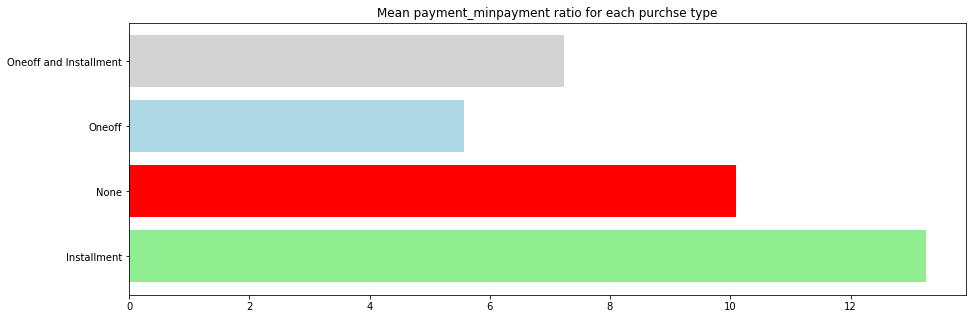

In [31]:
fig,ax=plt.subplots(figsize=(15,5))
ax.barh(y=range(len(x)), width=x.values,align='center',color=['lightgreen','red','lightblue','lightgrey'])
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')
plt.show()

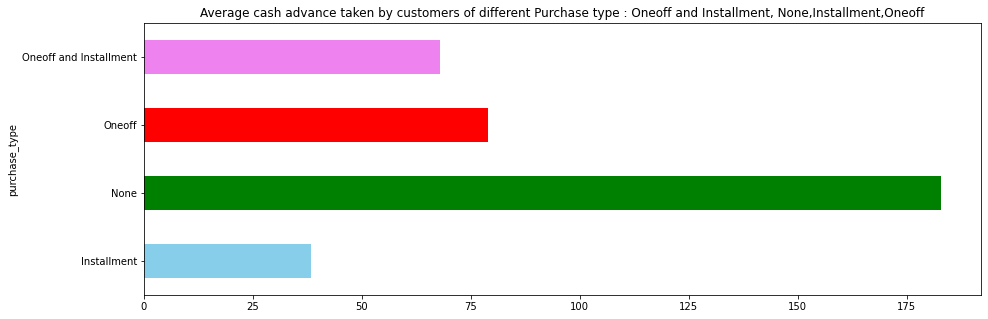

In [32]:
#customers with installment purchases are paying dues
plt.figure(figsize=(15,5))
credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['monthly_cash_advance'])).plot.barh(color=['skyblue','green','red','violet'])
plt.title('Average cash advance taken by customers of different Purchase type : Oneoff and Installment, None,Installment,Oneoff')
plt.show()

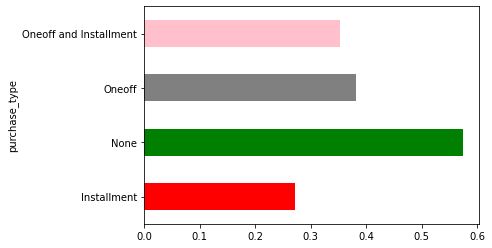

In [33]:
# Customers who don't do either one-off or installment purchases take more cash on advance
credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh(color=['red','green','grey','pink'])
plt.show()

In [34]:
# Original dataset with categorical column converted to number type
credit_original=pd.concat([credit_data,pd.get_dummies(credit_data['purchase_type'])],axis=1)
credit_original

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      installments_purchases  cash_advance  purchases_frequency  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      oneoff_purchases_frequency  purchases_installments_frequency  ...  \
0                       0.000000                          0.083333  ...   
1                       0.000000                          0.000000  ...   
2                       1.000000                          0.000000  ...   
3                       0.083333                          0.000000  ...   
4                       0.083333                          0.000000  ...   
...                          ...                               ...  ...   
8945                    0.000000                          0.833333  ...   
8946                    0.000000                          0.833333  ...   
8947                    0.000000                          0.666667  ...   
8948                    0.000000                          0.000000  ...   
8949                    0.666667                          0.000000  ...   

      tenure  monthly_avg_purchase  monthly_cash_advance  purchase_type  \
0         12              7.950000              0.000000    Installment   
1         12              0.000000            536.912124           None   
2         12             64.430833              0.000000         Oneoff   
3         12            124.916667             17.149001         Oneoff   
4         12              1.333333              0.000000         Oneoff   
...      ...                   ...                   ...            ...   
8945       6             48.520000              0.000000    Installment   
8946       6             50.000000              0.000000    Installment   
8947       6             24.066667              0.000000    Installment   
8948       6              0.000000              6.093130           None   
8949       6            182.208333             21.173335         Oneoff   

      limit_usage  payment_to_minpayments  Installment  None  Oneoff  \
0        0.040901                1.446508            1     0       0   
1        0.457495                3.826241            0     1       0   
2        0.332687                0.991682            0     0       1   
3        0.222223                0.000000            0     0       1   
4        0.681429                2.771075            0     0       1   
...           ...                     ...

In [35]:
col=['balance','purchases','cash_advance','tenure','payments','minimum_payments','prc_full_payment','credit_limit']
credit_pre=credit_log[[x for x in credit_log.columns if x not in col ]]

In [36]:
credit_pre.columns

Index(['balance_frequency', 'oneoff_purchases', 'installments_purchases',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'monthly_avg_purchase',
       'monthly_cash_advance', 'limit_usage', 'payment_to_minpayments'],
      dtype='object')

In [37]:
credit_log.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'monthly_avg_purchase', 'monthly_cash_advance', 'limit_usage',
       'payment_to_minpayments'],
      dtype='object')

## Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.

In [38]:
# Preparing Machine learning algorithm
# We do have some categorical data which need to convert with the help of dummy creation
# creating Dummies for categorical variable
credit_pre['purchase_type']=credit_data.loc[:,'purchase_type']
pd.get_dummies(credit_pre['purchase_type'])

Installment  None  Oneoff  Oneoff and Installment
0               1     0       0                       0
1               0     1       0                       0
2               0     0       1                       0
3               0     0       1                       0
4               0     0       1                       0
...           ...   ...     ...                     ...
8945            1     0       0                       0
8946            1     0       0                       0
8947            1     0       0                       0
8948            0     1       0                       0
8949            0     0       1                       0

[8950 rows x 4 columns]

In [39]:
# Now merge the created dummy with the original data frame
credit_dummy=pd.concat([credit_pre,pd.get_dummies(credit_pre['purchase_type'])],axis=1)
l=['purchase_type']
credit_dummy=credit_dummy.drop(l,axis=1)
credit_dummy.isnull().any()

balance_frequency                   False
oneoff_purchases                    False
installments_purchases              False
purchases_frequency                 False
oneoff_purchases_frequency          False
purchases_installments_frequency    False
cash_advance_frequency              False
cash_advance_trx                    False
purchases_trx                       False
monthly_avg_purchase                False
monthly_cash_advance                False
limit_usage                         False
payment_to_minpayments              False
Installment                         False
None                                False
Oneoff                              False
Oneoff and Installment              False
dtype: bool

In [40]:
credit_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_frequency                 8950 non-null   float64
 1   oneoff_purchases                  8950 non-null   float64
 2   installments_purchases            8950 non-null   float64
 3   purchases_frequency               8950 non-null   float64
 4   oneoff_purchases_frequency        8950 non-null   float64
 5   purchases_installments_frequency  8950 non-null   float64
 6   cash_advance_frequency            8950 non-null   float64
 7   cash_advance_trx                  8950 non-null   float64
 8   purchases_trx                     8950 non-null   float64
 9   monthly_avg_purchase              8950 non-null   float64
 10  monthly_cash_advance              8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

In [41]:
credit_dummy

balance_frequency  oneoff_purchases  installments_purchases  \
0              0.597837          0.000000                4.568506   
1              0.646627          0.000000                0.000000   
2              0.693147          6.651791                0.000000   
3              0.492477          7.313220                0.000000   
4              0.693147          2.833213                0.000000   
...                 ...               ...                     ...   
8945           0.693147          0.000000                5.677165   
8946           0.693147          0.000000                5.707110   
8947           0.606136          0.000000                4.979489   
8948           0.606136          0.000000                0.000000   
8949           0.510826          6.997824                0.000000   

      purchases_frequency  oneoff_purchases_frequency  \
0                0.154151                    0.000000   
1                0.000000                    0.000000   
2                0.693147                    0.693147   
3                0.080042                    0.080042   
4                0.080042                    0.080042   
...                   ...                         ...   
8945             0.693147                    0.000000   
8946             0.693147                    0.000000   
8947             0.606136                    0.000000   
8948             0.000000                    0.000000   
8949             0.510826                    0.510826   

      purchases_installments_frequency  cash_advance_frequency  \
0                             0.080042                0.000000   
1                             0.000000                0.223144   
2                             0.000000                0.000000   
3                             0.000000                0.080042   
4                             0.000000                0.000000   
...                                ...                     ...   
8945                          0.606136                0.000000   
8946                          0.606136                0.000000   
8947                          0.510826                0.000000   
8948                          0.000000                0.154151   
8949                          0.000000                0.287682   

      cash_advance_trx  purchases_trx  monthly_avg_purchase  \
0             0.000000       1.098612              2.191654   
1             1.609438       0.000000              0.000000   
2             0.000000       2.564949              4.180994   
3             0.693147       0.693147              4.835620   
4             0.000000       0.693147              0.847298   
...                ...            ...                   ...   
8945          0.000000       1.945910              3.902377   
8946          0.000000       1.945910              3.931826   
8947          0.000000       1.791759              3.221539   
8948          1.098612       0.000000              0.000000   
8949          1.098612       3.178054              5.210624   

      monthly_cash_advance  limit_usage  payment_to_minpayments  Installment  \
0                 0.000000     0.040086                0.894662            1   
1                 6.287695     0.376719                1.574068            0   
2                 0.000000     0.287197                0.688979            0   
3                 2.898616     0.200671                0.000000            0   
4                 0.000000     0.519644                1.327360            0   
...                    ...          ...                     ...          ...   
8945              0.000000     0.028095                2.036042            1   
8946              0.000000     0.019002                0.632971            1   
8947              0.000000     0.023129                0.686161            1   
8948              1.959127     0.026559                0.663978            0   
8949              3.098890     0.270477                0.53966

## Identification of the relationships/ affinities between services.

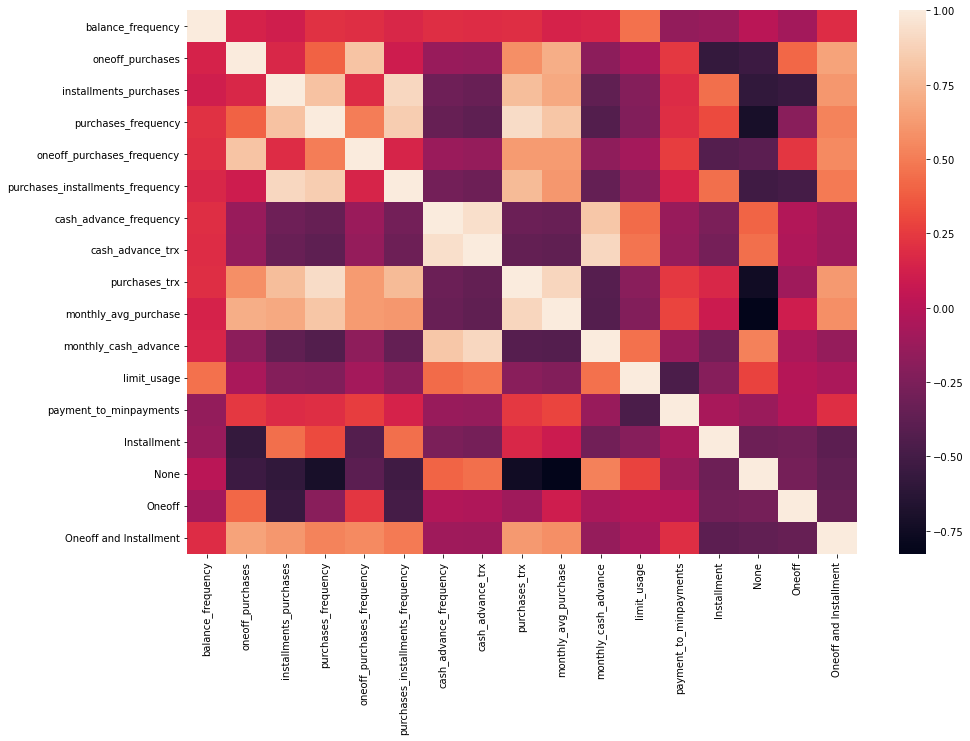

In [42]:
# Correlation by Heat Map
plt.figure(figsize=(15,10))
sns.heatmap(credit_dummy.corr())
plt.show()

In [43]:
# Heat map shows that many features are co-related so applying dimensionality reduction will help 
# negating multi-colinearity in data
# Before applying PCA we will standardize data to avoid effect of scale on our result. 
# Centering and Scaling will make all features with equal weight.

In [44]:
credit_dummy.shape

(8950, 17)

In [45]:
# Standardization of the data
sc=StandardScaler()
credit_scaled=sc.fit_transform(credit_dummy)
credit_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ..., -0.54369045,
        -0.514625  , -0.67019253],
       [ 0.17961568, -0.98708958, -1.08745376, ...,  1.83928189,
        -0.514625  , -0.67019253],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.54369045,
         1.94316249, -0.67019253],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ..., -0.54369045,
        -0.514625  , -0.67019253],
       [-0.09290575, -0.98708958, -1.08745376, ...,  1.83928189,
        -0.514625  , -0.67019253],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.54369045,
         1.94316249, -0.67019253]])

In [46]:
credit_scaled.shape

(8950, 17)

## Standardization of covariance (or) correlation

In [47]:
import numpy as np
corr_mat=np.corrcoef(credit_scaled,rowvar=False)
corr_mat

array([[ 1.        ,  0.14017041,  0.1105649 ,  0.21153304,  0.19911555,
         0.16227873,  0.19508333,  0.19134693,  0.19759446,  0.13653078,
         0.15334232,  0.45272773, -0.15343054, -0.1346136 ,  0.01150591,
        -0.08571855,  0.19143154],
       [ 0.14017041,  1.        ,  0.1614342 ,  0.39409339,  0.8139394 ,
         0.09715702, -0.1287871 , -0.14480319,  0.57439292,  0.71230633,
        -0.18249062, -0.06324767,  0.23677739, -0.57371701, -0.53667118,
         0.41466208,  0.66112609],
       [ 0.1105649 ,  0.1614342 ,  1.        ,  0.80421072,  0.19137954,
         0.9054429 , -0.31014962, -0.33562068,  0.78268267,  0.68756762,
        -0.37747874, -0.2176778 ,  0.18577319,  0.4487445 , -0.59123822,
        -0.55963089,  0.60727694],
       [ 0.21153304,  0.39409339,  0.80421072,  1.        ,  0.50347834,
         0.85697636, -0.34590168, -0.3825788 ,  0.9218596 ,  0.81717648,
        -0.43355391, -0.23340205,  0.19635027,  0.30993095, -0.708043  ,
        -0.19355185

## Decomposition

In [48]:
eigen_values,eigen_vectors=np.linalg.eig(corr_mat)

In [49]:
eigen_values

array([6.83498377e+00, 3.06996387e+00, 2.50399718e+00, 1.38730787e+00,
       1.11369216e+00, 7.07092302e-01, 3.81535781e-01, 3.48820956e-01,
       2.10244148e-01, 1.63386154e-01, 1.04297589e-01, 6.18719561e-03,
       2.84640775e-02, 5.15132330e-02, 4.48078405e-02, 4.37058708e-02,
       5.54913440e-15])

In [50]:
eigen_vectors

array([[-2.97070974e-02,  2.40072217e-01,  2.63139562e-01,
         3.53548687e-01, -2.28680754e-01, -6.93815814e-01,
         9.17378683e-02, -4.31064339e-01,  1.12621289e-01,
         7.26810486e-02,  3.27039926e-03, -2.84044517e-03,
         1.17993310e-02,  1.94718998e-02,  2.67736931e-02,
        -1.07740812e-02, -4.61608443e-15],
       [-2.14107206e-01,  4.06078184e-01, -2.39165449e-01,
        -1.51952417e-03, -2.31970077e-02,  1.29094254e-01,
        -1.12076711e-01, -1.08809159e-01,  7.50600478e-03,
         4.19112105e-02, -1.86745099e-01,  5.61410322e-01,
         5.65615937e-01, -1.04968406e-01,  6.07036157e-02,
         6.29228631e-02, -4.10073364e-13],
       [-3.12050629e-01, -9.84036594e-02,  3.15625277e-01,
        -8.79825993e-02, -2.18136948e-03,  1.15223015e-01,
        -1.58018221e-01, -7.47294835e-02,  1.79761704e-01,
         7.03188299e-02, -1.11173241e-01,  5.26958878e-01,
        -5.81150706e-01, -1.33108548e-02,  2.73825563e-01,
        -3.93395196e-02, -7.7

In [51]:
eigen_values.sum()

17.0

In [52]:
credit_scaled.shape

(8950, 17)

In [53]:
sorted_eig=sorted(eigen_values,reverse=True)
print(sorted_eig)

[6.834983774861101, 3.069963874871339, 2.503997176439101, 1.3873078698255632, 1.1136921559983048, 0.7070923019760157, 0.3815357812797745, 0.34882095600998303, 0.21024414812289388, 0.16338615448806404, 0.10429758860912113, 0.05151323304856596, 0.044807840525350966, 0.0437058708330902, 0.028464077505734268, 0.0061871956059905, 5.549134395320245e-15]


In [54]:
pc_data=pd.DataFrame({'PC':['PC{}'.format(i) for i in range(1,len(sorted_eig)+1)],
                     'var_cap_units':np.round(sorted_eig,2),
                      'var_cap_perc':np.round(sorted_eig/sum(sorted_eig)*100,2),
                     'cumulative_var_cap':np.cumsum(np.round(sorted_eig/sum(sorted_eig)*100,2))})

In [55]:
pc_data 

PC  var_cap_units  var_cap_perc  cumulative_var_cap
0    PC1           6.83         40.21               40.21
1    PC2           3.07         18.06               58.27
2    PC3           2.50         14.73               73.00
3    PC4           1.39          8.16               81.16
4    PC5           1.11          6.55               87.71
5    PC6           0.71          4.16               91.87
6    PC7           0.38          2.24               94.11
7    PC8           0.35          2.05               96.16
8    PC9           0.21          1.24               97.40
9   PC10           0.16          0.96               98.36
10  PC11           0.10          0.61               98.97
11  PC12           0.05          0.30               99.27
12  PC13           0.04          0.26               99.53
13  PC14           0.04          0.26               99.79
14  PC15           0.03          0.17               99.96
15  PC16           0.01          0.04              100.00
16  PC17           0.00          0.00              100.00

## Scree Plot:- It is a line plot of the eigen values (or) principal components in an analysis.

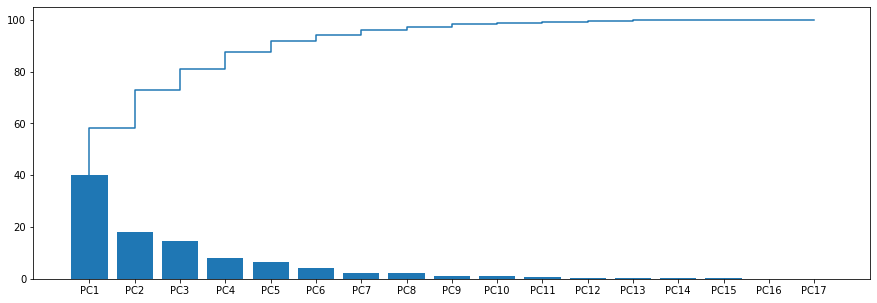

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(x=pc_data.PC,height=pc_data.var_cap_perc)
plt.step(x=pc_data.PC,y=pc_data.cumulative_var_cap)
plt.show()

## Dimensionality Reduction
## Applying Principal Components Analysis
## With the help of principal component analysis we will reduce features

In [57]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8) # above plot up to PC8 is is consistently plotted
credit_pca=pca.fit(credit_scaled)

In [58]:
final_credit_pca=credit_pca.fit_transform(credit_scaled)
final_credit_pca

array([[-2.42840830e-01, -2.75966826e+00,  3.43061432e-01, ...,
         1.97545848e-02, -1.89501836e-01, -6.48043362e-01],
       [-3.97565157e+00,  1.44625172e-01, -5.42989342e-01, ...,
        -5.72463497e-01, -9.80056186e-02,  9.45176245e-02],
       [ 1.28739573e+00,  1.50893846e+00,  2.70996571e+00, ...,
        -5.99931897e-01, -1.54952159e+00,  9.40265323e-01],
       ...,
       [ 1.15635917e+00, -2.79886435e+00, -5.36306171e-01, ...,
         1.93607315e-03, -7.49827906e-01, -4.19095720e-01],
       [-3.24994984e+00, -1.01563269e+00,  4.73838046e-01, ...,
        -3.79504564e-02, -1.17268758e+00, -6.70171739e-01],
       [ 2.38813534e-01,  2.22337787e+00,  1.83957974e+00, ...,
         7.80319412e-01, -1.21283695e+00,  7.48283046e-01]])

In [59]:
final_credit_pca.shape

(8950, 8)

In [60]:
pca.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ,
       0.70717132, 0.38157842, 0.34885993])

In [61]:
pca.explained_variance_ratio_

array([0.40205787, 0.18058611, 0.14729395, 0.08160635, 0.0655113 ,
       0.04159366, 0.02244328, 0.02051888])

In [62]:
pca.explained_variance_ratio_.sum() * 100

96.16114053683069

In [63]:
final_dataframe=pd.DataFrame(final_credit_pca)
final_dataframe

0         1         2         3         4         5         6  \
0    -0.242841 -2.759668  0.343061 -0.417359 -0.007100  0.019755 -0.189502   
1    -3.975652  0.144625 -0.542989  1.023832 -0.428929 -0.572463 -0.098006   
2     1.287396  1.508938  2.709966 -1.892252  0.010809 -0.599932 -1.549522   
3    -1.047613  0.673103  2.501794 -1.306784  0.761348  1.408986  0.092203   
4    -1.451586 -0.176336  2.286074 -1.624896 -0.561969 -0.675214  0.981584   
...        ...       ...       ...       ...       ...       ...       ...   
8945  1.779193 -2.618043 -0.737105 -0.076058  0.619959 -1.218891 -0.173057   
8946  1.614080 -2.657311 -0.934198 -0.943577  0.307854 -0.364028 -0.848192   
8947  1.156359 -2.798864 -0.536306 -0.681240  0.325711  0.001936 -0.749828   
8948 -3.249950 -1.015633  0.473838  0.815603 -1.125202 -0.037950 -1.172688   
8949  0.238814  2.223378  1.839580 -1.107814  1.745657  0.780319 -1.212837   

             7  
0    -0.648043  
1     0.094518  
2     0.940265  
3    -0.829556  
4    -0.307175  
...        ...  
8945 -0.386848  
8946 -0.638485  
8947 -0.419096  
8948 -0.670172  
8949  0.748283  

[8950 rows x 8 columns]

In [64]:
final_dataframe.shape

(8950, 8)

In [65]:
column_list=credit_dummy.columns
column_list

Index(['balance_frequency', 'oneoff_purchases', 'installments_purchases',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'monthly_avg_purchase',
       'monthly_cash_advance', 'limit_usage', 'payment_to_minpayments',
       'Installment', 'None', 'Oneoff', 'Oneoff and Installment'],
      dtype='object')

In [66]:
vc=pd.DataFrame(credit_pca.components_.T, columns=['PC_' +str(i) for i in range(8)],index=column_list)
vc

PC_0      PC_1      PC_2      PC_3  \
balance_frequency                 0.029707  0.240072 -0.263140 -0.353549   
oneoff_purchases                  0.214107  0.406078  0.239165  0.001520   
installments_purchases            0.312051 -0.098404 -0.315625  0.087983   
purchases_frequency               0.345823  0.015813 -0.162843 -0.074617   
oneoff_purchases_frequency        0.214702  0.362208  0.163222  0.036303   
purchases_installments_frequency  0.295451 -0.112002 -0.330029  0.023502   
cash_advance_frequency           -0.214336  0.286074 -0.278586  0.096353   
cash_advance_trx                 -0.229393  0.291556 -0.285089  0.103484   
purchases_trx                     0.355503  0.106625 -0.102743 -0.054296   
monthly_avg_purchase              0.345992  0.141635  0.023986 -0.079373   
monthly_cash_advance             -0.243861  0.264318 -0.257427  0.135292   
limit_usage                      -0.146302  0.235710 -0.251278 -0.431682   
payment_to_minpayments            0.119632  0.021328  0.136357  0.591561   
Installment                       0.082209 -0.443375 -0.208683 -0.190829   
None                             -0.310283 -0.005214 -0.096911  0.245104   
Oneoff                           -0.042138  0.167737  0.472749 -0.338549   
Oneoff and Installment            0.241392  0.273676 -0.131935  0.254710   

                                      PC_4      PC_5      PC_6      PC_7  
balance_frequency                -0.228681 -0.693816 -0.091738 -0.431064  
oneoff_purchases                 -0.023197  0.129094  0.112077 -0.108809  
installments_purchases           -0.002181  0.115223  0.158018 -0.074729  
purchases_frequency               0.115948 -0.081879 -0.265719  0.163099  
oneoff_purchases_frequency       -0.051279 -0.097299 -0.479280  0.481209  
purchases_installments_frequency  0.025871  0.006731 -0.020662 -0.018222  
cash_advance_frequency            0.360132  0.066589 -0.101587 -0.104467  
cash_advance_trx                  0.332753  0.082307 -0.061775 -0.060774  
purchases_trx                     0.104971 -0.009402 -0.108716  0.181946  
monthly_avg_purchase              0.194147  0.015878  0.155033  0.008362  
monthly_cash_advance              0.268026  0.058258 -0.027571  0.028310  
limit_usage                      -0.181885  0.024298  0.570283  0.542111  
payment_to_minpayments            0.215446 -0.572467  0.441032  0.155003  
Installment                       0.353821 -0.086087 -0.022871  0.129174  
None                             -0.342222 -0.176809 -0.226165  0.269452  
Oneoff                            0.362585 -0.060698  0.077363 -0.118463  
Oneoff and Installment           -0.340849  0.294708  0.158645 -0.261627

## Factor Analysis : variance explained by each component 

In [67]:
pd.Series(credit_pca.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(8)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
PC_6    0.022443
PC_7    0.020519
dtype: float64

## Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioral segments of credit card holders

## Clustering
## Using K-Means Clustering 

In [68]:
from sklearn.cluster import KMeans

## Finding optimal k value(number of optimized clusters) by using Elbow Method

In [69]:
errors=[]
for k in range (1,credit_scaled.shape[1]):
    kmm=KMeans(n_clusters=k)
    kmm.fit(final_credit_pca)
    errors.append(kmm.inertia_)

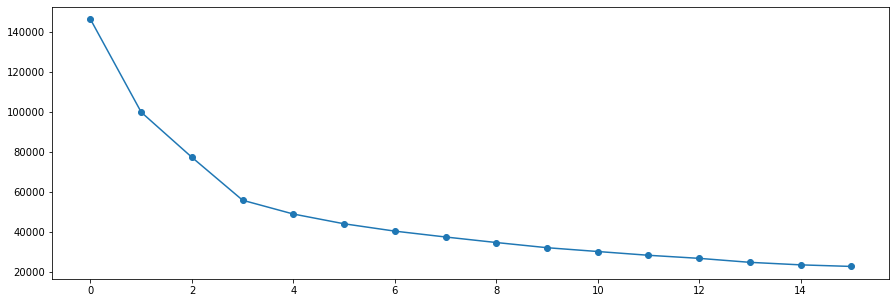

In [70]:
plt.figure(figsize=(15,5))
plt.plot(errors)
plt.scatter(range(len(errors)),errors)
plt.show()

In [71]:
# optimal k value(number of optimized clusters) = 4
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage 
z=linkage(credit_scaled,method='centroid', metric='euclidean')
clus_lab=fcluster(z,t=5,criterion='maxclust')
clus_lab

array([2, 1, 2, ..., 2, 1, 2], dtype=int32)

In [72]:
# K_means with optimal k_value
kmm=KMeans(n_clusters=4)
kmm.fit(credit_scaled)

KMeans(n_clusters=4)

In [73]:
credit_kmm=credit_dummy.copy()
credit_kmm['clus_lab']=kmm.labels_

## Identify cluster characteristics of the cluster using detailed profiling.

In [74]:
# Cluster Profiling
profile_kmm=credit_kmm.groupby('clus_lab').mean()
profile_kmm.insert(loc=0,column='size',value=credit_kmm.groupby('clus_lab').size())
profile_kmm

size  balance_frequency  oneoff_purchases  installments_purchases  \
clus_lab                                                                      
0         2770           0.662571          6.409031                6.149081   
1         2076           0.624065          0.008306                0.058801   
2         2232           0.584269          0.000000                5.755275   
3         1872           0.594814          5.826920                0.001715   

          purchases_frequency  oneoff_purchases_frequency  \
clus_lab                                                    
0                    0.577652                    0.338920   
1                    0.002522                    0.000235   
2                    0.513714                    0.000000   
3                    0.257159                    0.256976   

          purchases_installments_frequency  cash_advance_frequency  \
clus_lab                                                             
0                                 0.475319                0.088747   
1                                 0.001989                0.232822   
2                                 0.491172                0.040842   
3                                 0.000043                0.104491   

          cash_advance_trx  purchases_trx  monthly_avg_purchase  \
clus_lab                                                          
0                 0.649873       3.169426              4.768676   
1                 1.667160       0.017250              0.026756   
2                 0.302736       2.293540              3.379948   
3                 0.737379       1.615137              3.470367   

          monthly_cash_advance  limit_usage  payment_to_minpayments  \
clus_lab                                                              
0                     1.637612     0.277125                1.632857   
1                     4.487090     0.428861                1.136823   
2                     0.870595     0.200120                1.252825   
3                     1.908644     0.291295                1.320061   

          Installment      None    Oneoff  Oneoff and Installment  
clus_lab                                                           
0            0.000000  0.000000  0.000000                1.000000  
1            0.013487  0.983622  0.001445                0.001445  
2            1.000000  0.000000  0.000000                0.000000  
3            0.000000  0.000000  0.999466                0.000534

## Visualize

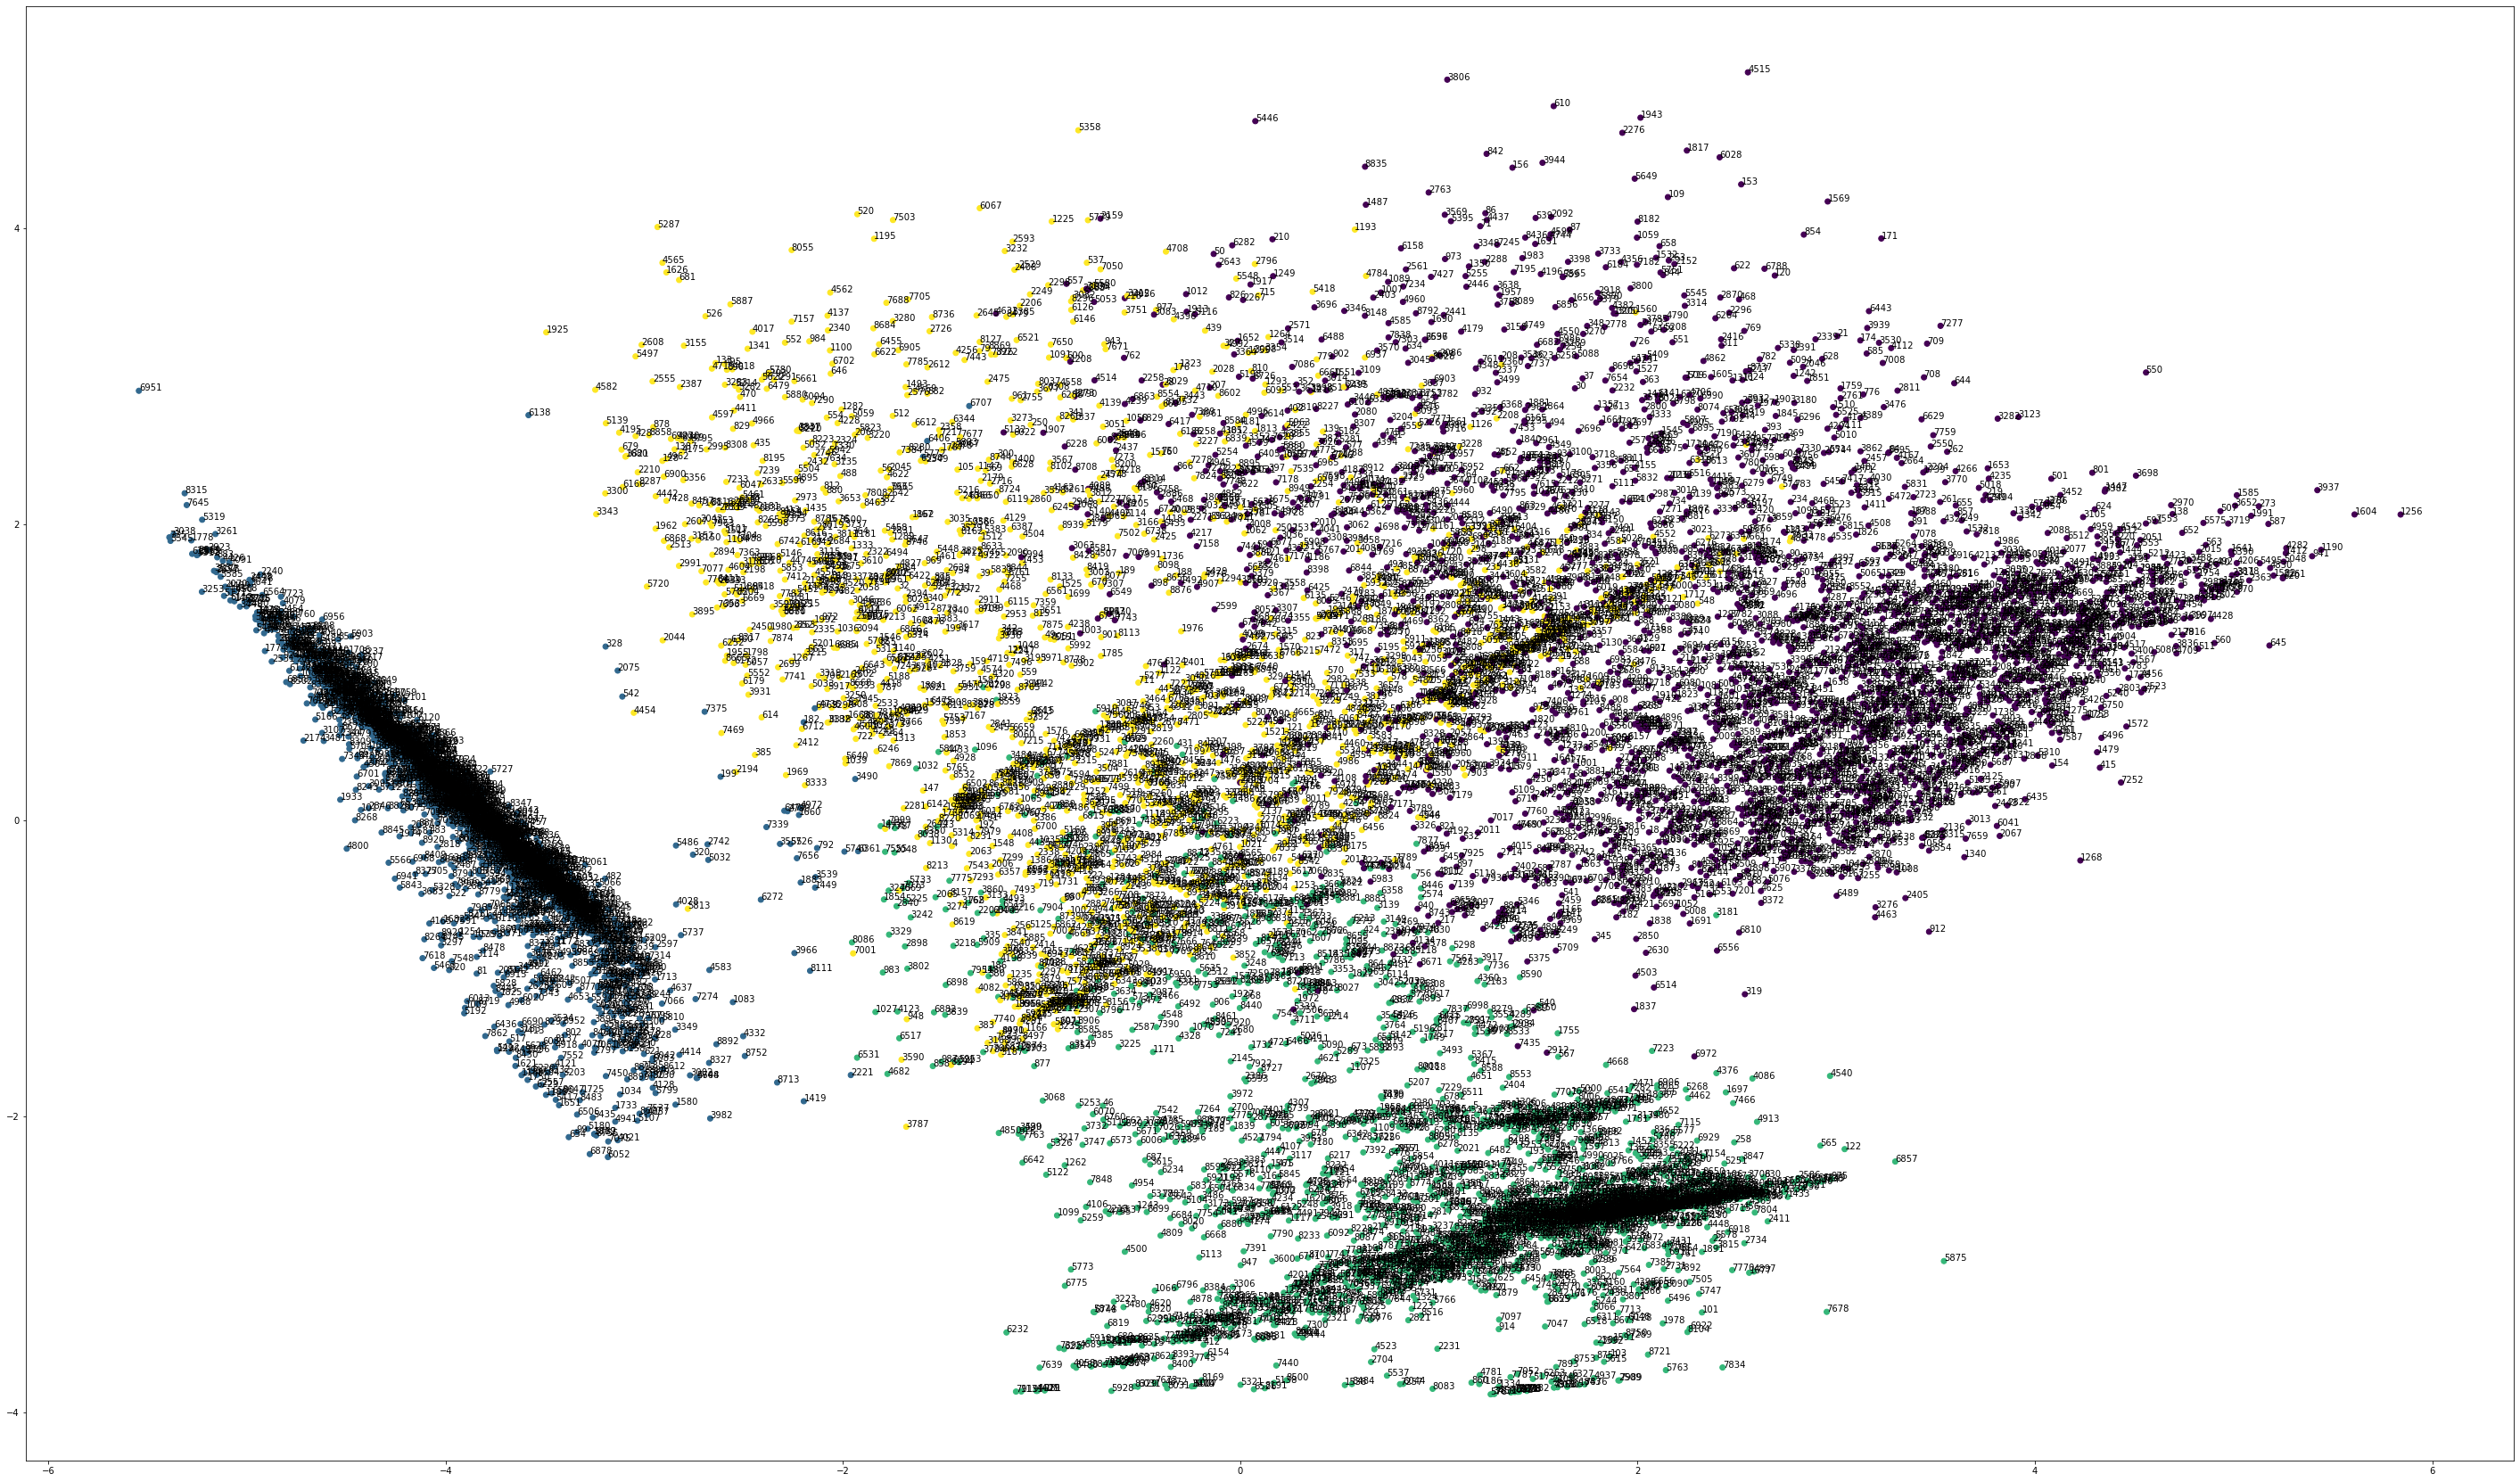

In [75]:
plt.figure(figsize=(50,30))
plt.scatter(final_credit_pca[:,0],final_credit_pca[:,1],c=kmm.labels_)
for i in range(8950):
    plt.annotate(i,(final_credit_pca[i,0],final_credit_pca[i,1]))
plt.show()

## Silhouette Coefficient

In [76]:
from sklearn import metrics
k_range = range(2, 17)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(credit_scaled)
    scores.append(metrics.silhouette_score(credit_scaled, km.labels_))

In [77]:
scores

[0.30389175040659155,
 0.3168634055668828,
 0.3885259779977948,
 0.3775501047321916,
 0.36649348617746963,
 0.3450652218128028,
 0.3492777262549943,
 0.3274447246396959,
 0.33294395259497706,
 0.30776177117642106,
 0.3107676303489159,
 0.29179226387693846,
 0.3050653095193717,
 0.29258693886671744,
 0.28365079530915627]

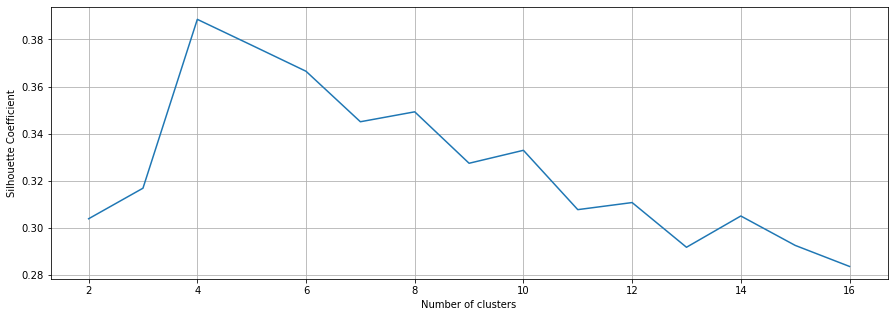

In [78]:
plt.figure(figsize=(15,5))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

## Scatter Plot

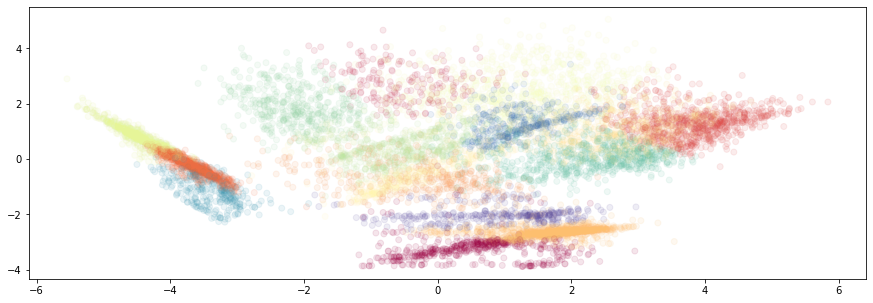

In [79]:
plt.figure(figsize=(15,5))
plt.scatter(final_credit_pca[:,0],final_credit_pca[:,1],c=km.labels_,cmap='Spectral',alpha=0.1)
plt.show()

In [80]:
pair_plot=pd.DataFrame(final_credit_pca,columns=['PC_' +str(i) for i in range(8)])
pair_plot['Cluster']=km.labels_ #Add cluster column in the data frame
pair_plot.head()

PC_0      PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  \
0 -0.242841 -2.759668  0.343061 -0.417359 -0.007100  0.019755 -0.189502   
1 -3.975652  0.144625 -0.542989  1.023832 -0.428929 -0.572463 -0.098006   
2  1.287396  1.508938  2.709966 -1.892252  0.010809 -0.599932 -1.549522   
3 -1.047613  0.673103  2.501794 -1.306784  0.761348  1.408986  0.092203   
4 -1.451586 -0.176336  2.286074 -1.624896 -0.561969 -0.675214  0.981584   

       PC_7  Cluster  
0 -0.648043        0  
1  0.094518        3  
2  0.940265       14  
3 -0.829556       10  
4 -0.307175       10

## pairwise relationship of components on the data

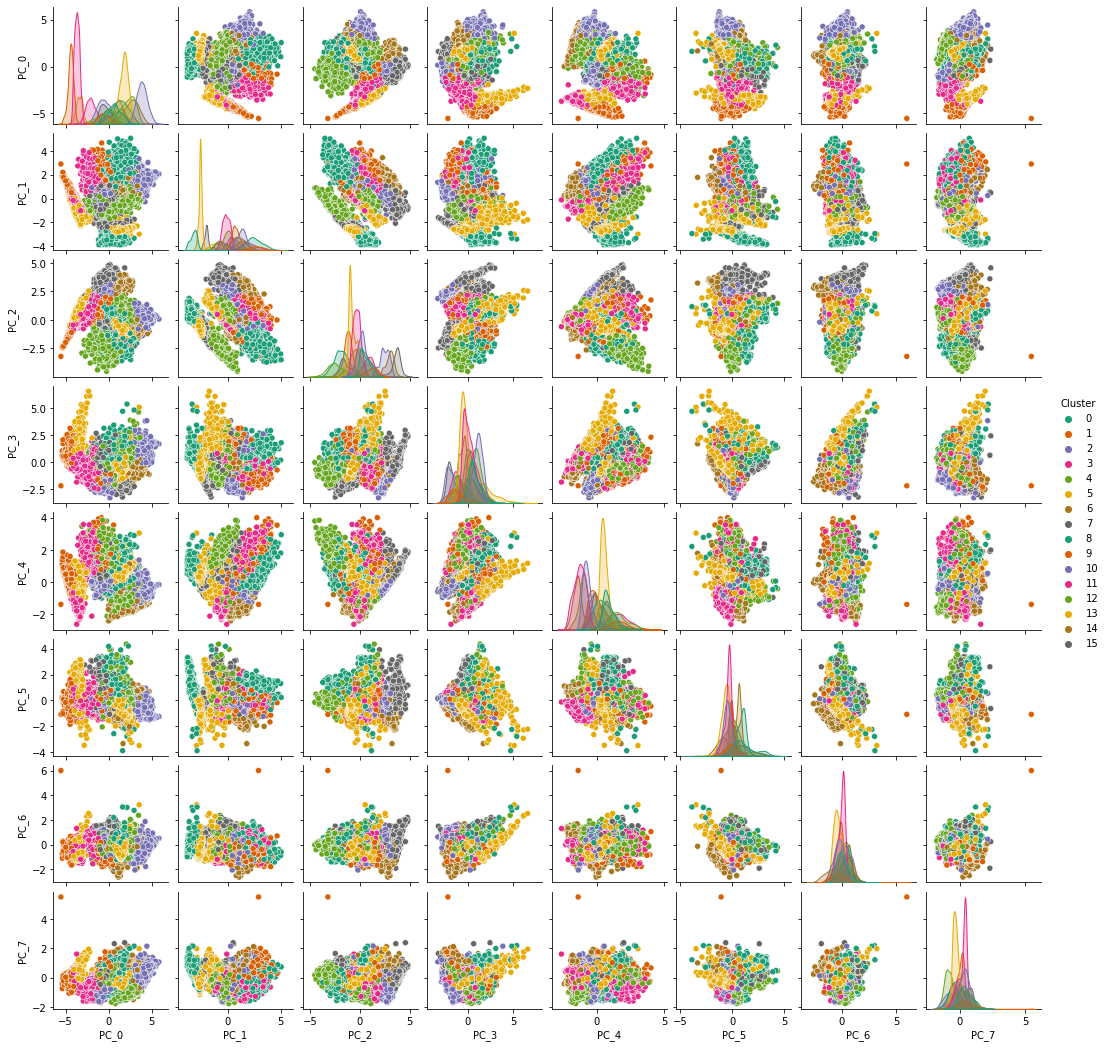

In [81]:
sns.pairplot(pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)
plt.show()

## It shows that first two components are able to indentify clusters
## Now we have done here with priciple component now we need to come bring our original data frame and we will merge the cluster with them

In [82]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
# We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

col_kpi=['purchases_trx','monthly_avg_purchase','monthly_cash_advance','limit_usage','cash_advance_trx',
         'payment_to_minpayments','Oneoff and Installment','Installment','Oneoff','None','credit_limit']

In [83]:
credit_pre.describe()

balance_frequency  oneoff_purchases  installments_purchases  \
count        8950.000000       8950.000000             8950.000000   
mean            0.619940          3.204274                3.352403   
std             0.148590          3.246365                3.082973   
min             0.000000          0.000000                0.000000   
25%             0.635989          0.000000                0.000000   
50%             0.693147          3.663562                4.499810   
75%             0.693147          6.360274                6.151961   
max             0.693147         10.615512               10.021315   

       purchases_frequency  oneoff_purchases_frequency  \
count          8950.000000                 8950.000000   
mean              0.361268                    0.158699   
std               0.277317                    0.216672   
min               0.000000                    0.000000   
25%               0.080042                    0.000000   
50%               0.405465                    0.080042   
75%               0.650588                    0.262364   
max               0.693147                    0.693147   

       purchases_installments_frequency  cash_advance_frequency  \
count                       8950.000000             8950.000000   
mean                           0.270072                0.113512   
std                            0.281852                0.156716   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.154151                0.000000   
75%                            0.559616                0.200671   
max                            0.693147                0.916291   

       cash_advance_trx  purchases_trx  monthly_avg_purchase  \
count       8950.000000    8950.000000           8950.000000   
mean           0.817570       1.894731              3.050877   
std            1.009316       1.373856              2.002823   
min            0.000000       0.000000              0.000000   
25%            0.000000       0.693147              1.481458   
50%            0.000000       2.079442              3.494587   
75%            1.609438       2.890372              4.587295   
max            4.820282       5.883322              8.315721   

       monthly_cash_advance  limit_usage  payment_to_minpayments  
count           8950.000000  8950.000000             8950.000000  
mean               2.163970     0.296081                1.357600  
std                2.429741     0.250303                0.940149  
min                0.000000     0.000000                0.000000  
25%                0.000000     0.040656                0.648817  
50%                0.000000     0.264455                1.109459  
75%                4.606022     0.540911                1.953415  
max                8.276166     2.827902                8.830767

In [84]:
# Conactenating labels found through Kmeans with data 
cluster_df_5=pd.concat([credit_original[col_kpi],pd.Series(km.labels_,name='Cluster_4')],axis=1)
cluster_df_5.head()

purchases_trx  monthly_avg_purchase  monthly_cash_advance  limit_usage  \
0              2              7.950000              0.000000     0.040901   
1              0              0.000000            536.912124     0.457495   
2             12             64.430833              0.000000     0.332687   
3              1            124.916667             17.149001     0.222223   
4              1              1.333333              0.000000     0.681429   

   cash_advance_trx  payment_to_minpayments  Oneoff and Installment  \
0                 0                1.446508                       0   
1                 4                3.826241                       0   
2                 0                0.991682                       0   
3                 1                0.000000                       0   
4                 0                2.771075                       0   

   Installment  Oneoff  None  credit_limit  Cluster_4  
0            1       0     0        1000.0          0  
1            0       0     1        7000.0          3  
2            0       1     0        7500.0         14  
3            0       1     0        7500.0         10  
4            0       1     0        1200.0         10

## Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster

In [85]:
cluster_5=cluster_df_5.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_5=cluster_5.loc[:,0:3]
cluster_5

Cluster_4                         0            1            2            3
purchases_trx              5.626033    15.484848    54.182781     0.000960
monthly_avg_purchase      21.192964   125.783746   350.912749     0.000000
monthly_cash_advance       2.150536   198.269312     6.087106   103.872749
limit_usage                0.014338     0.599390     0.152230     0.658802
cash_advance_trx           0.051653     6.898990     0.223841     2.816699
payment_to_minpayments    33.451120     3.712963    14.554611     1.896901
Oneoff and Installment     0.012397     0.000000     1.000000     0.000000
Installment                0.987603     0.000000     0.000000     0.000000
Oneoff                     0.000000     1.000000     0.000000     0.000000
None                       0.000000     0.000000     0.000000     1.000000
credit_limit            3390.002296  4966.161616  7029.139073  3459.117083

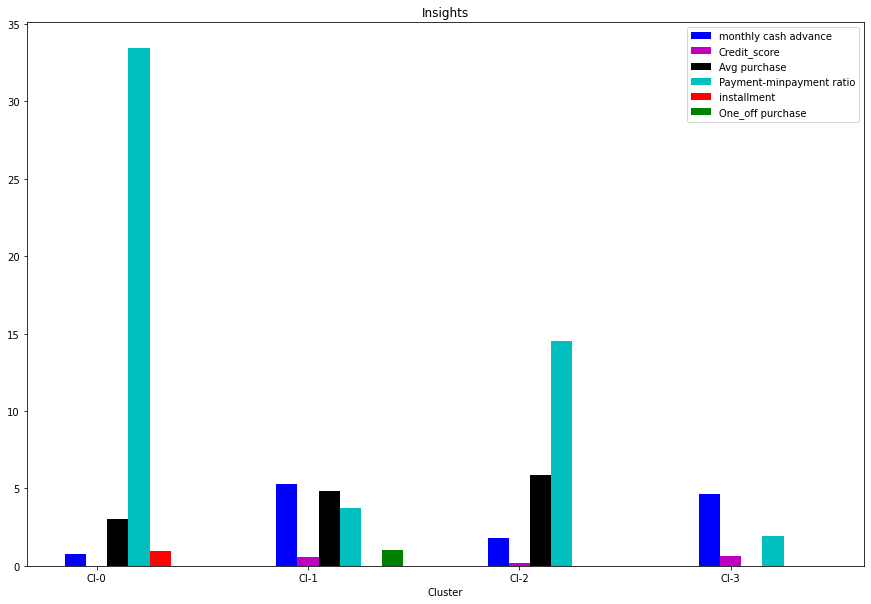

In [86]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_5.columns))

cash_advance=np.log(cluster_5.loc['monthly_cash_advance',:].values)
credit_score=(cluster_5.loc['limit_usage',:].values)
purchase= np.log(cluster_5.loc['monthly_avg_purchase',:].values)
payment=cluster_5.loc['payment_to_minpayments',:].values
installment=cluster_5.loc['Installment',:].values
one_off=cluster_5.loc['Oneoff',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()
plt.show()

## Provide the strategic insights and implementation of strategies for given set of cluster characteristics

## Insights

## Clusters are clearly distinguishing behavior within customers
## Cluster 0 customers are doing maximum in minimum payment ratio and least monthly cash advance. This group is about 35% of the total customer base
## cluster 1 is taking maximum cash advance and is paying comparatively less One off purchase and poor credit_score & doing no installment. This group is about 24% of the total customer base
## Cluster 2 is the group of customers who have highest payment min payment ratio and no installment as well as one_off purchases, have comparatively good credit score. This group is about 25% of the total customer base
## Cluster 3 customers have maximum monthly cash advance and are paying dues and are doing payment minimum payment ratio. There is no average purchase and one off purchases This group is about 16% of the total customer base.